In [1]:
# Importing relevant libaries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading in pre processed excel file
df = pd.read_excel("/Users/suhayl/Data Science modules/IGP/Data/IGP_updated_data.xlsx")

In [3]:
df.head()

,Year,Total,maternity,population
0,2008-04,6918254,NaN,61823772
1,2008-05,6506145,NaN,61823772
2,2008-06,6809466,NaN,61823772
3,2008-07,7163355,NaN,61823772
4,2008-08,6134809,NaN,61823772


In [263]:
df.tail()

,Total_admissions,maternity,population
Year,,,
2017-11-01,9226346,56116.0,66040229
2017-12-01,7455220,54721.0,66040229
2018-01-01,8965179,56257.0,66040229
2018-02-01,8114870,51270.0,66040229
2018-03-01,8593300,56648.0,66040229


In [4]:
# Changing column names
df.columns = ["Year", "Total_admissions", "maternity", "population"]

In [5]:
df.head()

,Year,Total_admissions,maternity,population
0,2008-04,6918254,NaN,61823772
1,2008-05,6506145,NaN,61823772
2,2008-06,6809466,NaN,61823772
3,2008-07,7163355,NaN,61823772
4,2008-08,6134809,NaN,61823772


In [6]:
# Checking data type of "year" column
type("year")

str

In [7]:
# Coverting "year" column to DateTime object
df["Year"] = pd.to_datetime(df["Year"])

In [8]:
# Setting "year" column as index
df.set_index("Year", inplace=True)

In [9]:
df.head()

,Total_admissions,maternity,population
Year,,,
2008-04-01,6918254,NaN,61823772
2008-05-01,6506145,NaN,61823772
2008-06-01,6809466,NaN,61823772
2008-07-01,7163355,NaN,61823772
2008-08-01,6134809,NaN,61823772


In [10]:
# populating Null values in "maternity" columns using backwards fill method
new_df = df.fillna(method="bfill")
new_df.head()

,Total_admissions,maternity,population
Year,,,
2008-04-01,6918254,57955.0,61823772
2008-05-01,6506145,57955.0,61823772
2008-06-01,6809466,57955.0,61823772
2008-07-01,7163355,57955.0,61823772
2008-08-01,6134809,57955.0,61823772


In [11]:
# Dropping and creating new DataFrame with "year" and "Total admissions"
new_df.drop("maternity", axis=1, inplace=True)

In [12]:
new_df

,Total_admissions,population
Year,,
2008-04-01,6918254,61823772
2008-05-01,6506145,61823772
2008-06-01,6809466,61823772
2008-07-01,7163355,61823772
2008-08-01,6134809,61823772
...,...,...
2017-11-01,9226346,66040229
2017-12-01,7455220,66040229
2018-01-01,8965179,66040229


In [13]:
new_df.drop("population",axis=1,inplace=True)

In [14]:
new_df.shape

(120, 1)

In [15]:
new_df

,Total_admissions
Year,
2008-04-01,6918254
2008-05-01,6506145
2008-06-01,6809466
2008-07-01,7163355
2008-08-01,6134809
...,...
2017-11-01,9226346
2017-12-01,7455220
2018-01-01,8965179


<AxesSubplot:xlabel='Year'>

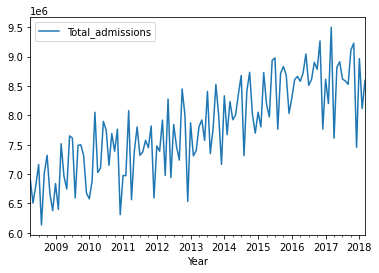

In [16]:
new_df.plot()

In [17]:
# Testing for stationarity
from statsmodels.tsa.stattools import adfuller

In [18]:
test_result = adfuller(new_df["Total_admissions"])

In [62]:
#H0: It is non staionary
#H1: It is stationary

def adfuller_test(Total_admissions):
    result = adfuller(Total_admissions)
    labels = ["ADF Test statistic", "p-value", "#Lags used", "Number of oberservations used"]
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and it is staionary")
    else:
        print("Weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary")

In [20]:
adfuller_test(new_df["Total_admissions"])

ADF Test statistic : -1.6944501433627661
p-value : 0.43397417467741156
#Lags used : 11
Number of oberservations used : 108
Weak evidence against the null hypothesis, time series has a unit root, idicating it is non-stationary


In [184]:
# Differenecing the data to make it stationary
# Shfiting the data by 12 positions due to data being seasonal
new_df['seasonal first difference'] = new_df["Total_admissions"] - new_df["Total_admissions"].shift(12)

In [185]:
# Testing for stationarity on shifted data
adfuller_test(new_df["seasonal first difference"].dropna())

ADF Test statistic : -1.8142115079760779
p-value : 0.3734292491149153
#Lags used : 13
Number of oberservations used : 94
Weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary


<AxesSubplot:xlabel='Year'>

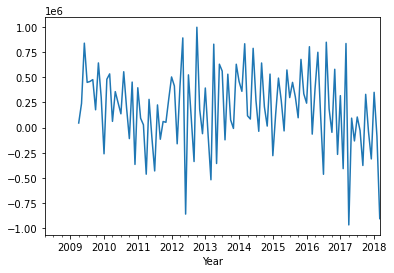

In [186]:
new_df["seasonal first difference"].plot()

In [187]:
new_df['Adjusted log'] = np.log(new_df["Total_admissions"])
new_df['Adjusted sqrt'] = np.sqrt(new_df["Total_admissions"])
new_df['Adjusted cbrt'] = np.cbrt(new_df["Total_admissions"])

<AxesSubplot:xlabel='Year'>

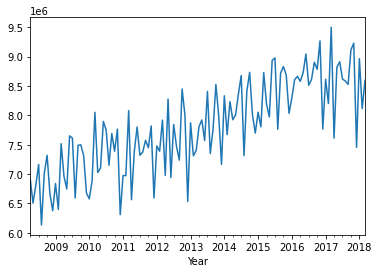

In [188]:
new_df["Total_admissions"].dropna().plot()

In [189]:
new_df["Total_admissions_log_diff"] = new_df["Adjusted log"] - new_df["Adjusted log"].shift(12)

<AxesSubplot:xlabel='Year'>

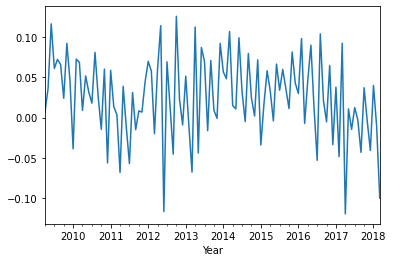

In [190]:
new_df["Total_admissions_log_diff"].dropna().plot()

In [191]:
adfuller_test(new_df["Total_admissions_log_diff"].dropna())

ADF Test statistic : -2.755796301528552
p-value : 0.06487062537766337
#Lags used : 3
Number of oberservations used : 104
Weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary


In [192]:
new_df["Total_admissions_sqrt_diff"] = new_df["Adjusted sqrt"] - new_df["Adjusted sqrt"].shift(12)

<AxesSubplot:xlabel='Year'>

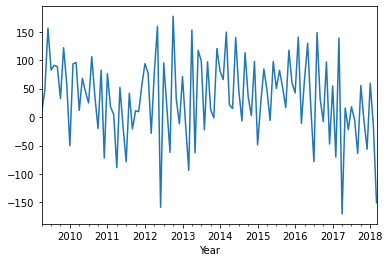

In [193]:
new_df["Total_admissions_sqrt_diff"].dropna().plot()

In [194]:
adfuller_test(new_df["Total_admissions_sqrt_diff"].dropna())

ADF Test statistic : -2.608511326665921
p-value : 0.09125087808572868
#Lags used : 12
Number of oberservations used : 95
Weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary


In [195]:
new_df["Total_admissions_cbrt_diff"] = new_df["Adjusted cbrt"] - new_df["Adjusted cbrt"].shift(12)

<AxesSubplot:xlabel='Year'>

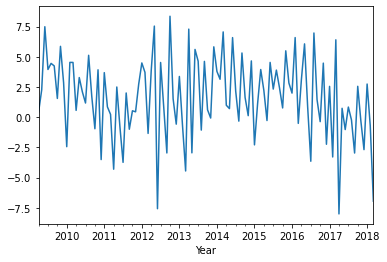

In [196]:
new_df["Total_admissions_cbrt_diff"].dropna().plot()

In [197]:
adfuller_test(new_df["Total_admissions_cbrt_diff"].dropna())

ADF Test statistic : -2.614041378899574
p-value : 0.09012978728677468
#Lags used : 12
Number of oberservations used : 95
Weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary


In [198]:
new_df["MA20"] = new_df["Total_admissions"].rolling(window = 30).mean()

<AxesSubplot:xlabel='Year'>

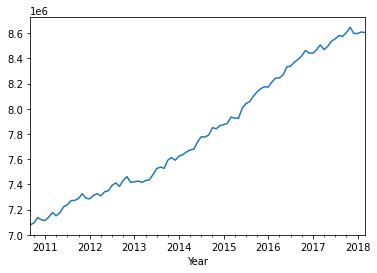

In [199]:
new_df["MA20"].dropna().plot()

In [200]:
adfuller_test(new_df["MA20"].dropna())

ADF Test statistic : -1.7930867046946593
p-value : 0.3838993143885129
#Lags used : 12
Number of oberservations used : 78
Weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary


In [201]:
import statsmodels.api as sm

In [202]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


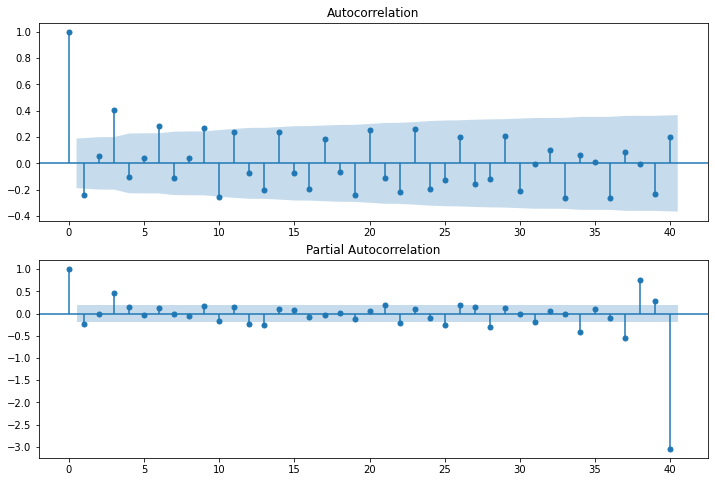

In [203]:
# Plotting the Autocorrelation and partial correlation charts
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(new_df["seasonal first difference"].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(new_df["seasonal first difference"].dropna(),lags=40,ax=ax2)

In [204]:
# Creating seasonal Arima model
model = sm.tsa.statespace.SARIMAX(new_df["Total_admissions"],order=(1,1,1),seasonal_order=(1,1,1,12))

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [205]:
results = model.fit()

In [206]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   Total_admissions   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1562.981
Date:                            Wed, 27 Apr 2022   AIC                           3135.961
Time:                                    05:24:39   BIC                           3149.325
Sample:                                04-01-2008   HQIC                          3141.379
                                     - 03-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0453      0.263     -0.172      0.863      -0.561       0.471
ma.L1         -0.2912      0.276     -1.055      0.292      -0.832       0.250
ar.S.L12       0.6054      0.046     13.026      0.000       0.514       0.696
ma.S.L12      -1.0000      0.085    -11.720      0.000      -1.167      -0.833
sigma2      1.649e+11   5.18e-13   3.19e+23      0.000    1.65e+11    1.65e+11
===================================================================================
Ljung-Box (L1) (Q):                  23.40   Jarque-Bera (JB):                13.62
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                            -0.64
Prob(H) (two-sided):                  0.77   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.29e+40. Standard errors may be unstable.
"""

In [220]:
new_df['forecast'] = results.predict(start=90, end=103,dynamic=True)

<AxesSubplot:xlabel='Year'>

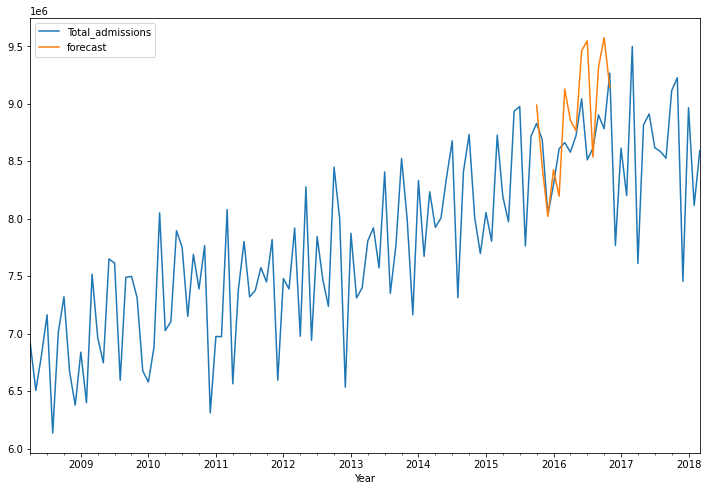

In [221]:
new_df[['Total_admissions', 'forecast']].plot(figsize=(12,8))

In [222]:
# Make predictions using the model 
from pandas.tseries.offsets import DateOffset

In [265]:
future_dates_24 = [new_df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [266]:
future_dataset_df = pd.DataFrame(index=future_dates_24[1:],columns=new_df.columns)

In [225]:
future_dataset_df.tail()

,Total_admissions,seasonal first difference,forecast,Adjusted log,Adjusted sqrt,Adjusted cbrt,Total_admissions_log_diff,Total_admissions_sqrt_diff,Total_admissions_cbrt_diff,MA20
2019-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
future_df = pd.concat([new_df,future_dataset_df])

In [260]:
future_df["forecast"] = results.predict(start = 119, end = 160, dynamic=True)

<AxesSubplot:>

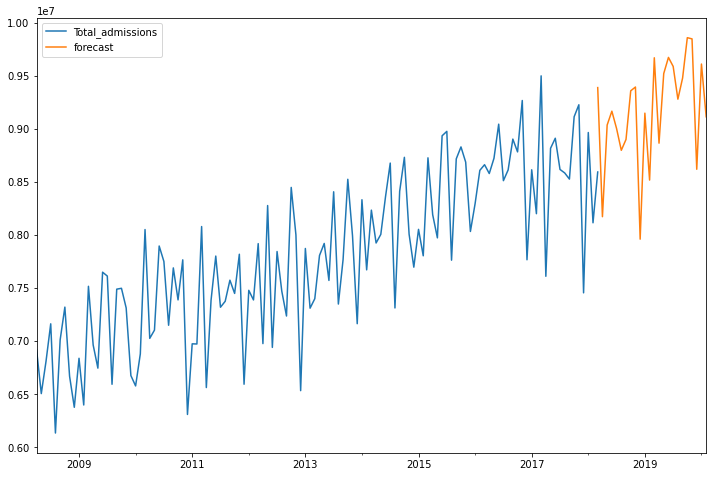

In [261]:
future_df[["Total_admissions","forecast"]].plot(figsize=(12,8))

In [217]:
print("Mean absolute percent error:", round(np.mean(abs(residuals/new_df["Total_admissions"])),4))

NameError: name 'residuals' is not defined

In [262]:
future_df.tail(40)

,Total_admissions,seasonal first difference,forecast,Adjusted log,Adjusted sqrt,Adjusted cbrt,Total_admissions_log_diff,Total_admissions_sqrt_diff,Total_admissions_cbrt_diff,MA20
2016-11-01,9266581,580351.0,NaN,16.041925,3044.105944,210.042176,0.064675,96.864862,4.479731,8.462412e+06
2016-12-01,7766670,-266456.0,NaN,15.865352,2786.874594,198.036367,-0.033732,-47.402387,-2.239303,8.442609e+06
2017-01-01,8614083,318031.0,NaN,15.968909,2934.975809,204.991735,0.037619,54.689018,2.554457,8.440505e+06
2017-02-01,8200556,-408170.0,NaN,15.919713,2863.661293,201.657525,-0.048574,-70.401760,-3.291707,8.470097e+06
2017-03-01,9498590,836609.0,NaN,16.066654,3081.978261,211.780701,0.092200,138.853901,6.409721,8.506340e+06
2017-04-01,7611013,-967794.0,NaN,15.845107,2758.806445,196.704436,-0.119699,-170.153610,-8.007091,8.468992e+06
2017-05-01,8816683,94272.0,NaN,15.992156,2969.289982,206.586407,0.010750,15.917165,0.738945,8.495958e+06
2017-06-01,8911174,-132466.0,NaN,16.002817,2985.158957,207.321802,-0.014756,-22.105581,-1.022242,8.536432e+06
2017-07-01,8617260,105668.0,NaN,15.969278,2935.516990,205.016933,0.012338,18.053709,0.841446,8.555243e+06
2017-08-01,8584193,-28051.0,NaN,15.965433,2929.879349,204.754360,-0.003262,-4.783153,-0.222786,8.581249e+06
